In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_curve, auc, confusion_matrix, r2_score, mean_absolute_error,
                           mean_squared_error)
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
import seaborn as sns
plt.style.use('seaborn-v0_8')


In [4]:
# Gerando dados sintéticos para classificação
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando um modelo simples
modelo = LogisticRegression(random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
y_pred_proba = modelo.predict_proba(X_test)[:, 1]

# Calculando métricas
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAcurácia: {acuracia:.3f}")
print(f"Precisão: {precisao:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")


Acurácia: 0.850
Precisão: 0.877
Recall: 0.826
F1-Score: 0.850


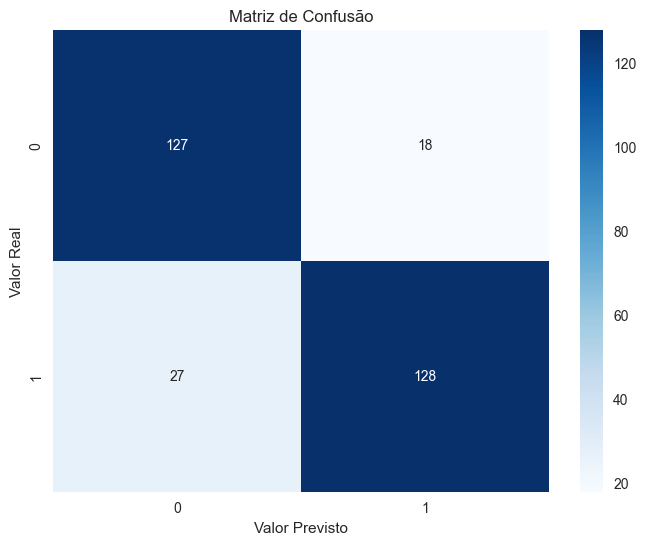

In [6]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

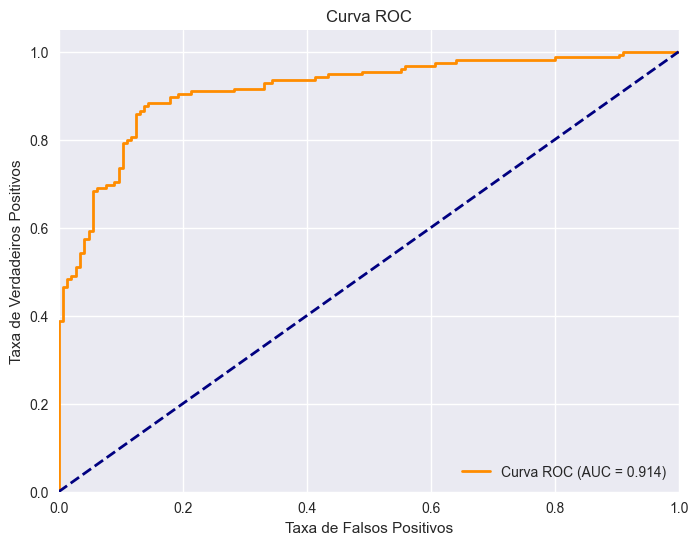

In [7]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Métricas para regressão

In [19]:
# Gerando dados sintéticos para regressão
X, y = make_regression(n_samples=3000, n_features=20, noise=50, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando um modelo simples
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Calculando métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nCoeficiente de Determinação (R²): {r2:.3f}")
print(f"Erro Médio Absoluto (MAE): {mae:.3f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.3f}")


Coeficiente de Determinação (R²): 0.940
Erro Médio Absoluto (MAE): 40.420
Raiz do Erro Quadrático Médio (RMSE): 50.048


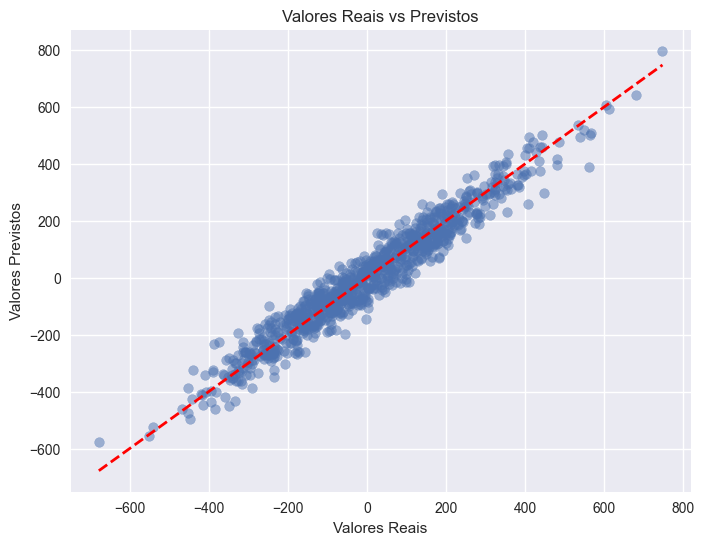

In [20]:
# Visualização dos resultados
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs Previstos')
plt.show()